<IPython.core.display.Javascript object>


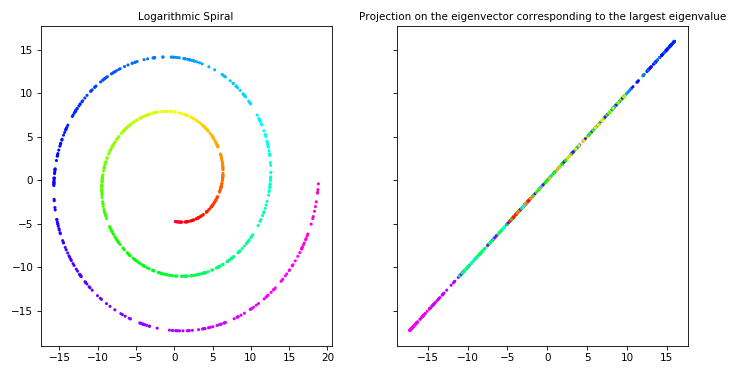

In [40]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import logging
import random


logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)

from mapalign.mapalign.embed import DiffusionMapEmbedding
from matplotlib import cm
from topics_ws1718_DimReductionMethods import PCA, LLE, diffmap

random.seed(42)
N = 700
t = (3*np.pi/2)*(1+3*np.random.rand(1,N))
x = (t*np.cos(t)).T
y = (t*np.sin(t)).T

X = np.concatenate((x,y),axis=1)
X_PCA = PCA(X,1)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10, 5))
ax1.scatter(x,y,c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
ax1.set_title('Logarithmic Spiral',fontsize=10)
ax2.scatter(X_PCA[:,0].reshape(N,1),X_PCA[:,0].reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
ax2.set_title('Projection on the eigenvector corresponding to the largest eigenvalue',fontsize=10)
fig.tight_layout()
plt.show()







<IPython.core.display.Javascript object>


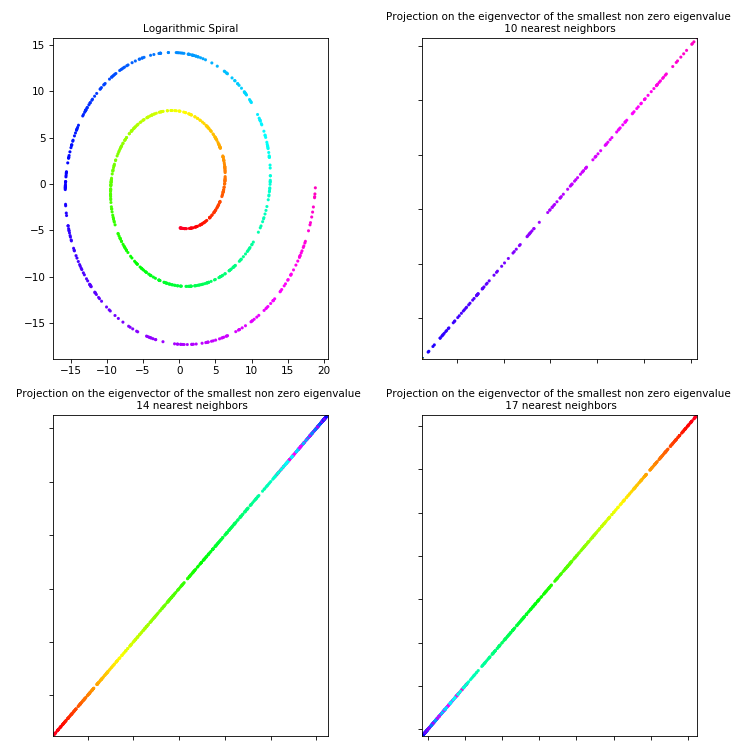

In [42]:
fig, axarr = plt.subplots(2, 2,figsize=(10, 10))
axarr[0, 0].scatter(x,y,c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
axarr[0, 0].set_title('Logarithmic Spiral',fontsize=10)
X_LLE = LLE(X,10,1)
axarr[0, 1].scatter(X_LLE[:,0].reshape(N,1),X_LLE[:,0].reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
axarr[0, 1].set_title('Projection on the eigenvector of the smallest non zero eigenvalue \n 10 nearest neighbors ',fontsize=10)
lim = np.amax(X_LLE[:,0])
mlim = np.amin(X_LLE[:,0])
axarr[0, 1].set_xlim([mlim, lim])
axarr[0, 1].set_ylim([mlim, lim])
axarr[0, 1].set_yticklabels([])
axarr[0, 1].set_xticklabels([])
X_LLE = LLE(X,14,1)
axarr[1, 0].scatter(X_LLE[:,0].reshape(N,1),X_LLE[:,0].reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
axarr[1, 0].set_title('Projection on the eigenvector of the smallest non zero eigenvalue \n 14 nearest neighbors',fontsize=10)
lim = np.amax(X_LLE[:,0])
mlim = np.amin(X_LLE[:,0])
axarr[1, 0].set_xlim([mlim, lim])
axarr[1, 0].set_ylim([mlim, lim])
axarr[1, 0].set_yticklabels([])
axarr[1, 0].set_xticklabels([])
X_LLE = LLE(X,17,1)
axarr[1, 1].scatter(X_LLE[:,0].reshape(N,1),X_LLE[:,0].reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
axarr[1, 1].set_title('Projection on the eigenvector of the smallest non zero eigenvalue \n 17 nearest neighbors',fontsize=10)
lim = np.amax(X_LLE[:,0])
mlim = np.amin(X_LLE[:,0])
axarr[1, 1].set_xlim([mlim, lim])
axarr[1, 1].set_ylim([mlim, lim])
axarr[1, 1].set_yticklabels([])
axarr[1, 1].set_xticklabels([])
fig.tight_layout()
plt.show()

(500,)


<IPython.core.display.Javascript object>


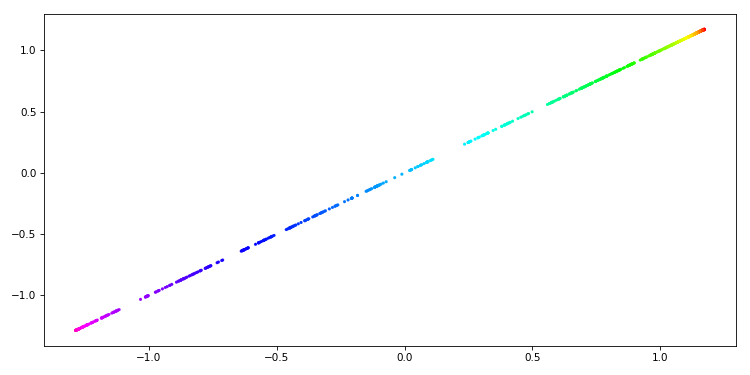

In [41]:
de = DiffusionMapEmbedding(alpha=1, diffusion_time=1000, affinity='markov',n_components=2).fit_transform(X.copy())

print(ed.shape)
fig, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10, 5))
ax1.scatter(de[:,0].reshape(N,1),de[:,0].reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
fig.tight_layout()
plt.show()

(500,)

In [ ]:
V,W = diffmap(X,0,0.9,2)

(300,)


<IPython.core.display.Javascript object>


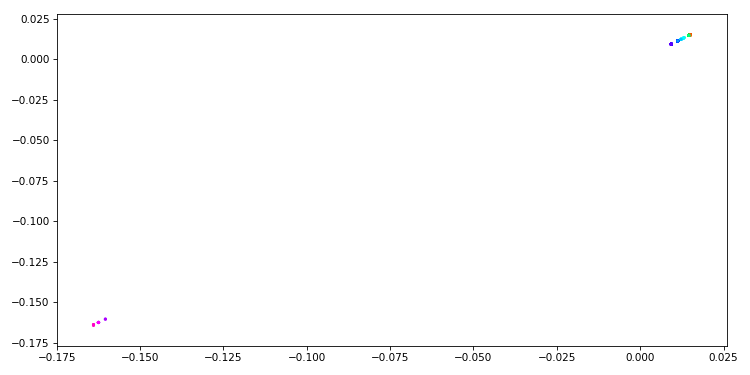

In [20]:
X_diff = np.real(V[:,1])
print(X_diff.shape)
fig, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10, 5))
ax1.scatter(X_diff.reshape(N,1),X_diff.reshape(N,1),c=(t.T),marker='o',s=8,lw=0.1,alpha=1,cmap=cm.gist_rainbow)
fig.tight_layout()
plt.show()